# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
#load in libraries
import pandas as pd
import numpy as np


# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
# Code here
#Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked
#passengers = ["1st", "2nd", "3rd"]
#df_passengers = df_titanic[df_titanic['class'].isin(passengers)]
#pd.crosstab(df_passengers['class'], df_passengers['embarked'])

df_titanic["class"].unique()

df_titanic["type"] = df_titanic["class"].map({
    "1st" : "passenger",
    "2nd" : "passenger",
    "3rd" : "passenger",
    "victualling crew" : "crew",
    "engineering crew" : "crew",
    "deck crew" : "crew",
    "restaurant staff" : "crew"
})

where_passengers = df_titanic['type'] == "passenger"
df_passengers = df_titanic[where_passengers]
df_passengers

joint_ec = pd.crosstab(df_passengers['class'], df_passengers['embarked'])
joint_ec



embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?

69.7%
* What proportion of Southampton passengers were in 3rd class?

54.1%

In [4]:
# Code here

#conditional distribution of their class given where they embarked
joint_ec
marginal_class = joint_ec.sum(axis = 0)
joint_ec.divide(marginal_class)

conditional_ec = pd.crosstab(df_passengers['class'], df_passengers['embarked'], normalize='index')
conditional_ec

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [5]:
#conditional distribution of where they embarked given their class
joint_ec
marginal_embarked = joint_ec.sum(axis = 1)
joint_ec.divide(marginal_embarked)

conditional_ec = pd.crosstab(df_passengers['embarked'], df_passengers['class'], normalize='index')
conditional_ec

class,1st,2nd,3rd
embarked,,,
B,0.333333,0.666667,0.000000
C,0.527675,0.095941,0.376384
Q,0.024390,0.056911,0.918699
S,0.191466,0.268053,0.540481


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

<Axes: xlabel='embarked'>

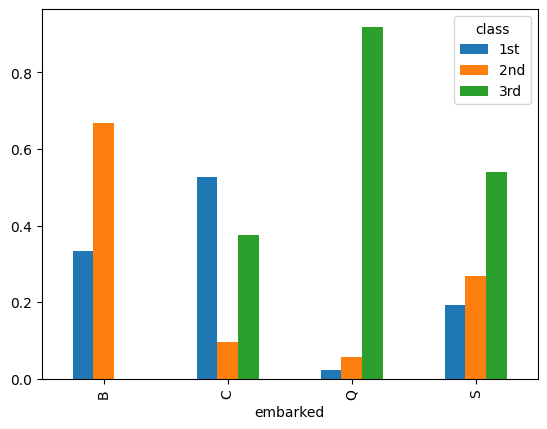

In [7]:
#make a visualization showing the distribution of a passenger's class, given where they embarked
conditional_ec["embarked"] = conditional_ec.index
conditional_ec

#make a visualization showing the distribution of a passenger's class, given where they embarked
conditional_ec.plot(kind="bar", x="embarked")

